<a href="https://colab.research.google.com/github/Danial-sb/PageRank/blob/main/Pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np

In [2]:
def create_star_graph(nodes):
  G = nx.star_graph(nodes)
  #G = G.to_directed(as_view = False)
  nx.draw(G, with_labels = True)
  return G

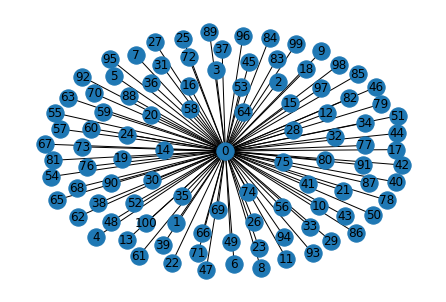

In [3]:
graph = create_star_graph(100)

In [4]:
def create_graph():
  G = nx.karate_club_graph()
  #G = G.to_directed()
  return G

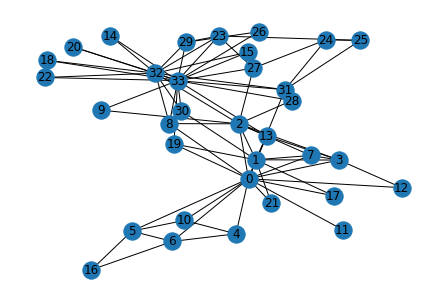

In [5]:
kar = create_graph()
nx.draw(kar, with_labels = True)

In [6]:
pg0 = nx.pagerank(kar, max_iter=1, tol = 10, alpha = 0.8)[0]
pg0

0.1281045751633987

In [7]:
kar.edges(0)

EdgeDataView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)])

In [8]:
a = [(kar.degree(edge[1])) for edge in kar.edges(1)]
a

[16, 10, 6, 4, 5, 2, 3, 2, 4]

In [9]:
def initialize(G):
  N = 1/G.number_of_nodes()
  points = [N for i in range(G.number_of_nodes())]
  return points

In [10]:
def pagerank(G, iters, beta = 0.8):

  pg = initialize(G)
  N = G.number_of_nodes()
  for _ in range(iters):
    for node in G.nodes:
      #for n in G.neighbors(node):
        #deg = G.degree(n)
        pg[node] = round(sum([beta * pg[node] / G.degree(edge[1]) for edge in G.edges(node)]) + (1-beta) * 1/G.number_of_nodes(), 4)
        #pg[node] = pg[node] + beta * (pg[n] / (deg))
      #pg[node]+= (1-beta)*1/N
      #pg[node] = round(pg[node], 2)

  return pg

In [11]:
def get_node_ranks(points):
  array_of_points = np.array(points)
  pagerank = np.argsort(-array_of_points)
  return pagerank

In [12]:
def built_in_pagerank(G):
  pagerank = nx.pagerank(G, alpha = 0.8)
  rank_of_nodes = sorted(pagerank.items(), key = lambda x:x[1], reverse = True)
  return rank_of_nodes

In [13]:
def main():

  #graph = create_star_graph(100)
  graph = create_graph()
  #graph = ex_g
  points = pagerank(graph, 1)
  pageranks = get_node_ranks(points)
  builtin_pagerank = built_in_pagerank(graph)
  return points, pageranks, builtin_pagerank


main()

([0.1281,
  0.0615,
  0.0566,
  0.0347,
  0.0211,
  0.0328,
  0.0328,
  0.0162,
  0.0189,
  0.0096,
  0.0211,
  0.0074,
  0.0113,
  0.0176,
  0.0092,
  0.0092,
  0.0176,
  0.01,
  0.0092,
  0.0114,
  0.0092,
  0.01,
  0.0092,
  0.0288,
  0.0235,
  0.0224,
  0.0131,
  0.0222,
  0.0135,
  0.0257,
  0.0165,
  0.0342,
  0.0935,
  0.1416],
 array([33,  0, 32,  1,  2,  3, 31,  5,  6, 23, 29, 24, 25, 27,  4, 10,  8,
        16, 13, 30,  7, 28, 26, 19, 12, 21, 17,  9, 18, 20, 22, 14, 15, 11]),
 [(33, 0.09833298540908077),
  (0, 0.094561178981564),
  (32, 0.07006405452640968),
  (2, 0.05510962827358582),
  (1, 0.05152334607950814),
  (31, 0.03672846196415317),
  (3, 0.035206868710526563),
  (23, 0.03138523208020211),
  (5, 0.02965434765152121),
  (6, 0.02965434765152121),
  (8, 0.029203590410895465),
  (13, 0.028920243421725694),
  (29, 0.026528036905982717),
  (27, 0.025720946173829452),
  (30, 0.02443262236845383),
  (7, 0.02429306613631948),
  (4, 0.022556530085318473),
  (10, 0.022556530085

#### **Implementing the pagerank formula as matrix form**

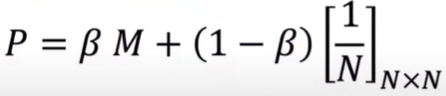

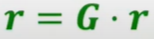


In [14]:
def storchastic_adj_matrix(adj_matrix):

    zero_rows = np.where(~adj_matrix.any(axis=1))[0]
    for row in zero_rows:
        adj_matrix[row] = [entry + 1 for entry in adj_matrix[row]]

    st_matrix = []
    for row in adj_matrix:
        links = sum(row)
        st_matrix.append([entry / links for entry in row])

    st_matrix = np.array(st_matrix)
    return st_matrix.T

In [15]:
def one_over_N(G):
  N = np.ones((G.number_of_nodes(), G.number_of_nodes())) / G.number_of_nodes()
  return N

In [16]:
def initialize_nodes(G):
  r = np.ones((G.number_of_nodes(), 1)) / G.number_of_nodes()
  return r

In [17]:
def matrix_G(beta):
  graph = create_star_graph(100)
  adj = nx.to_pandas_adjacency(graph).to_numpy()
  M = storchastic_adj_matrix(adj)
  N = one_over_N(graph)
  r = initialize_nodes(graph)
  G = beta * M + (1-beta) * N

  return G, r

In [18]:
def converge(iters):
  G, r = matrix_G(0.8)
  for iter in range(iters):
    r = G @ r

  return r

array([[0.44052193],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.00559478],
       [0.005

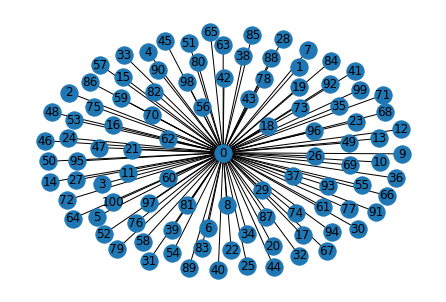

In [19]:
pagerank = converge(20)
pagerank

In [20]:
builtin_pagerank = built_in_pagerank(graph)
builtin_pagerank

[(0, 0.4455635294088176),
 (1, 0.005544364705911839),
 (2, 0.005544364705911839),
 (3, 0.005544364705911839),
 (4, 0.005544364705911839),
 (5, 0.005544364705911839),
 (6, 0.005544364705911839),
 (7, 0.005544364705911839),
 (8, 0.005544364705911839),
 (9, 0.005544364705911839),
 (10, 0.005544364705911839),
 (11, 0.005544364705911839),
 (12, 0.005544364705911839),
 (13, 0.005544364705911839),
 (14, 0.005544364705911839),
 (15, 0.005544364705911839),
 (16, 0.005544364705911839),
 (17, 0.005544364705911839),
 (18, 0.005544364705911839),
 (19, 0.005544364705911839),
 (20, 0.005544364705911839),
 (21, 0.005544364705911839),
 (22, 0.005544364705911839),
 (23, 0.005544364705911839),
 (24, 0.005544364705911839),
 (25, 0.005544364705911839),
 (26, 0.005544364705911839),
 (27, 0.005544364705911839),
 (28, 0.005544364705911839),
 (29, 0.005544364705911839),
 (30, 0.005544364705911839),
 (31, 0.005544364705911839),
 (32, 0.005544364705911839),
 (33, 0.005544364705911839),
 (34, 0.005544364705911839